In [144]:
import pandas as pd

In [145]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

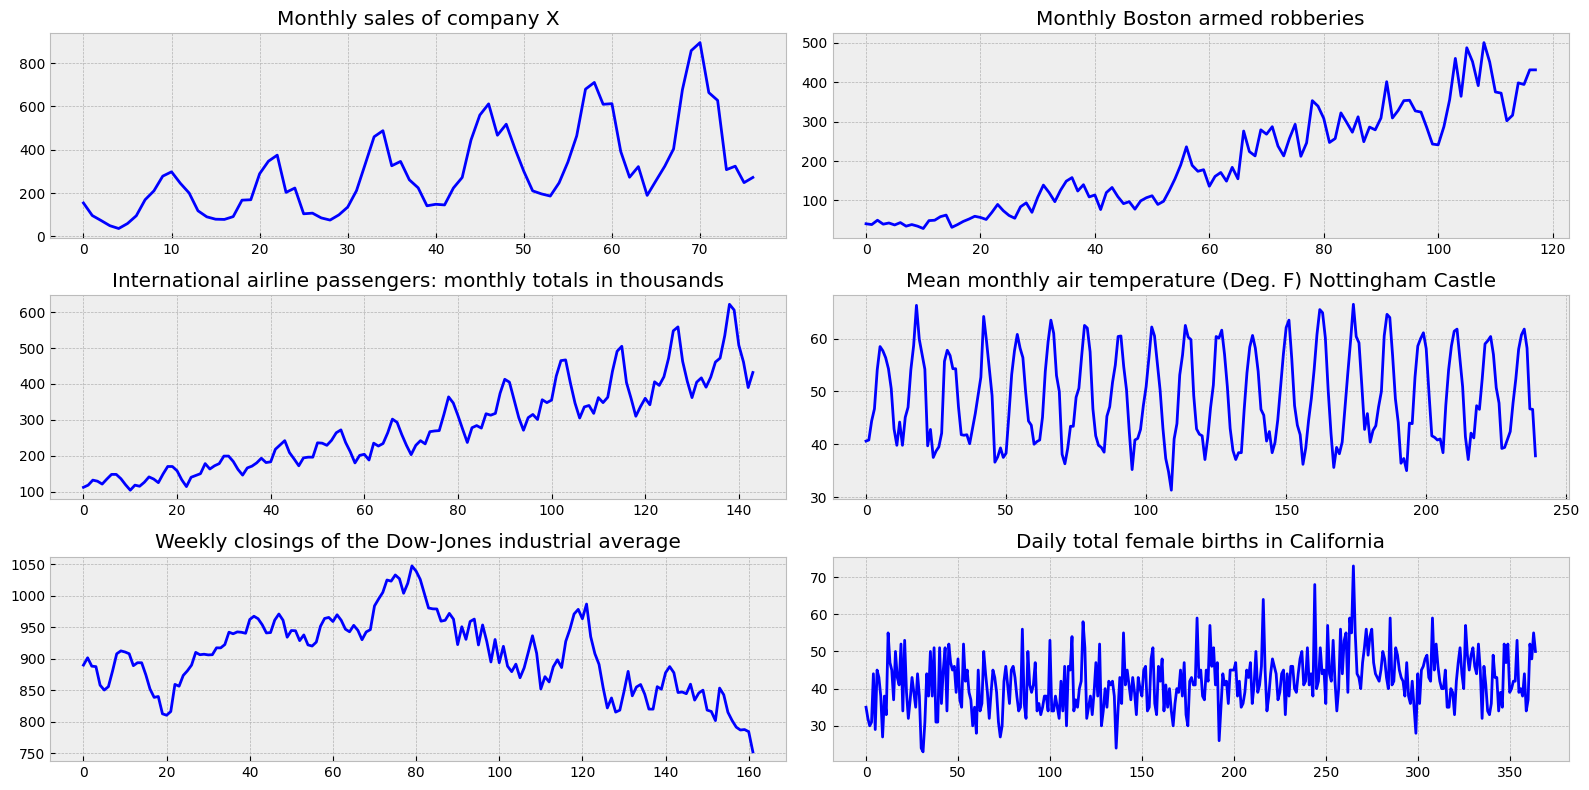

In [148]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [149]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

In [150]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [156]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

# 1. Monthly sales of company X

In [157]:
test_stationarity(all_series["Monthly sales of company X"])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


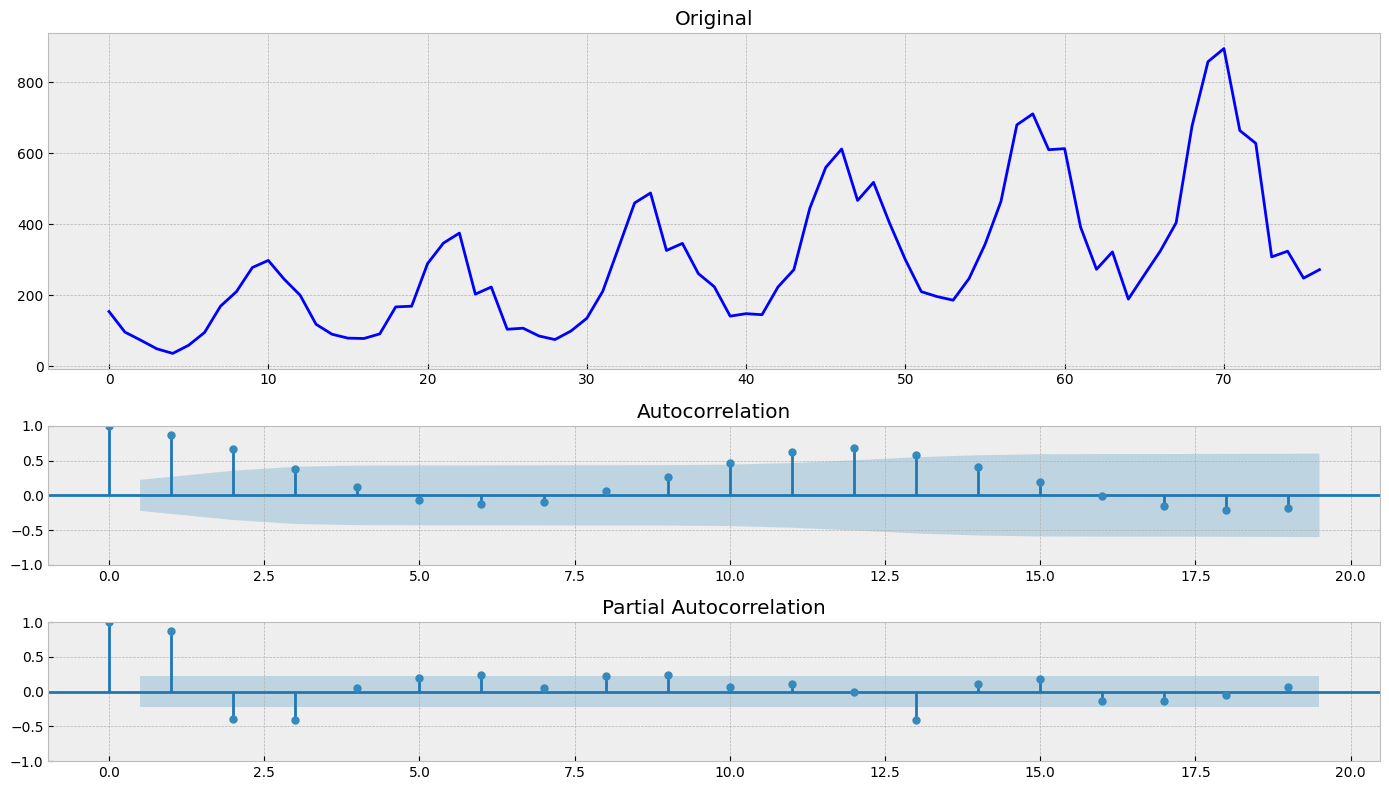

In [158]:
tsplot(all_series["Monthly sales of company X"])

In [159]:
# Приводим к стационарному виду:
# Нормализуем дисперсию
# Убираем тренд и сезонность

from scipy.stats import boxcox
import numpy as np

In [160]:
monthly_sales_of_company_X = boxcox(all_series["Monthly sales of company X"], 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


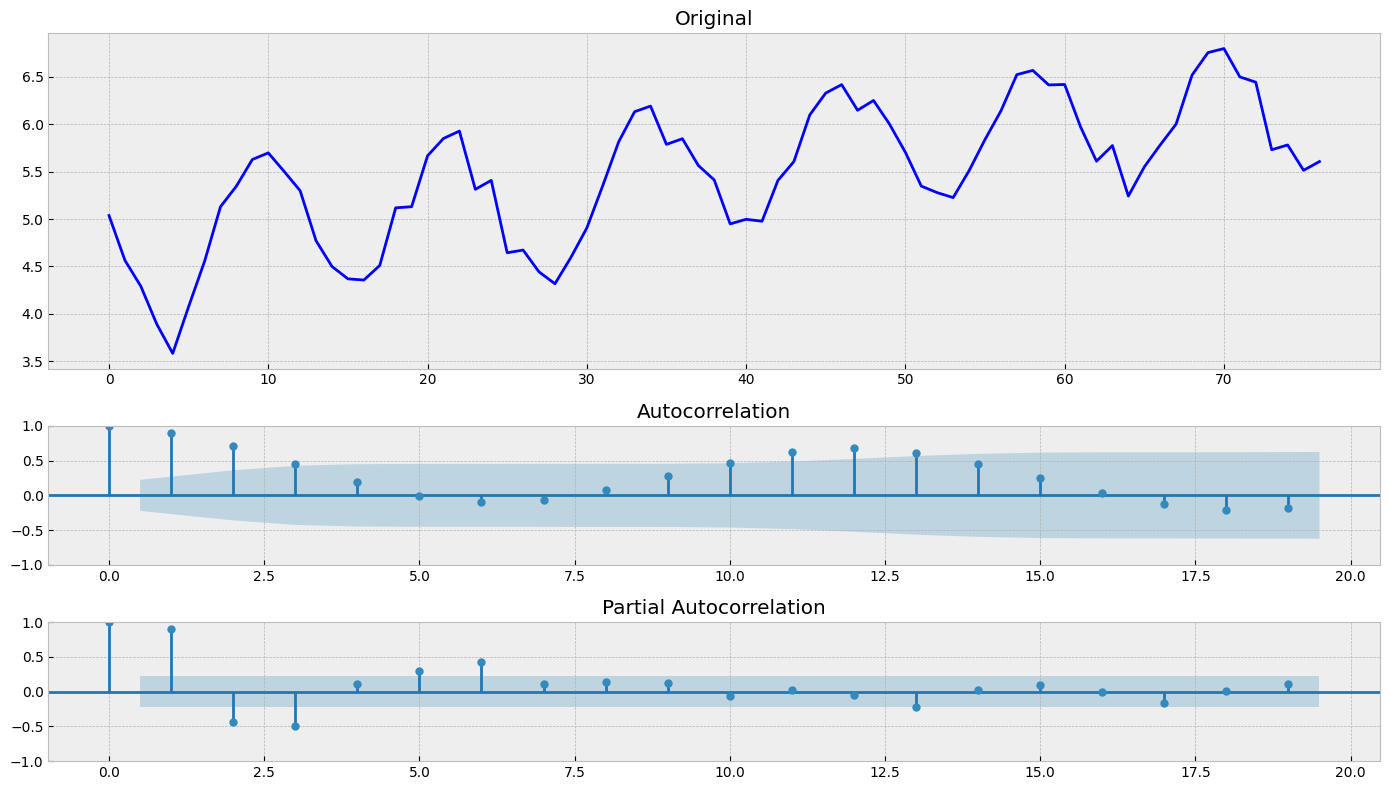

In [161]:
test_stationarity(monthly_sales_of_company_X)
tsplot(monthly_sales_of_company_X)

In [162]:
monthly_sales_of_company_X = np.diff(monthly_sales_of_company_X, 1)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


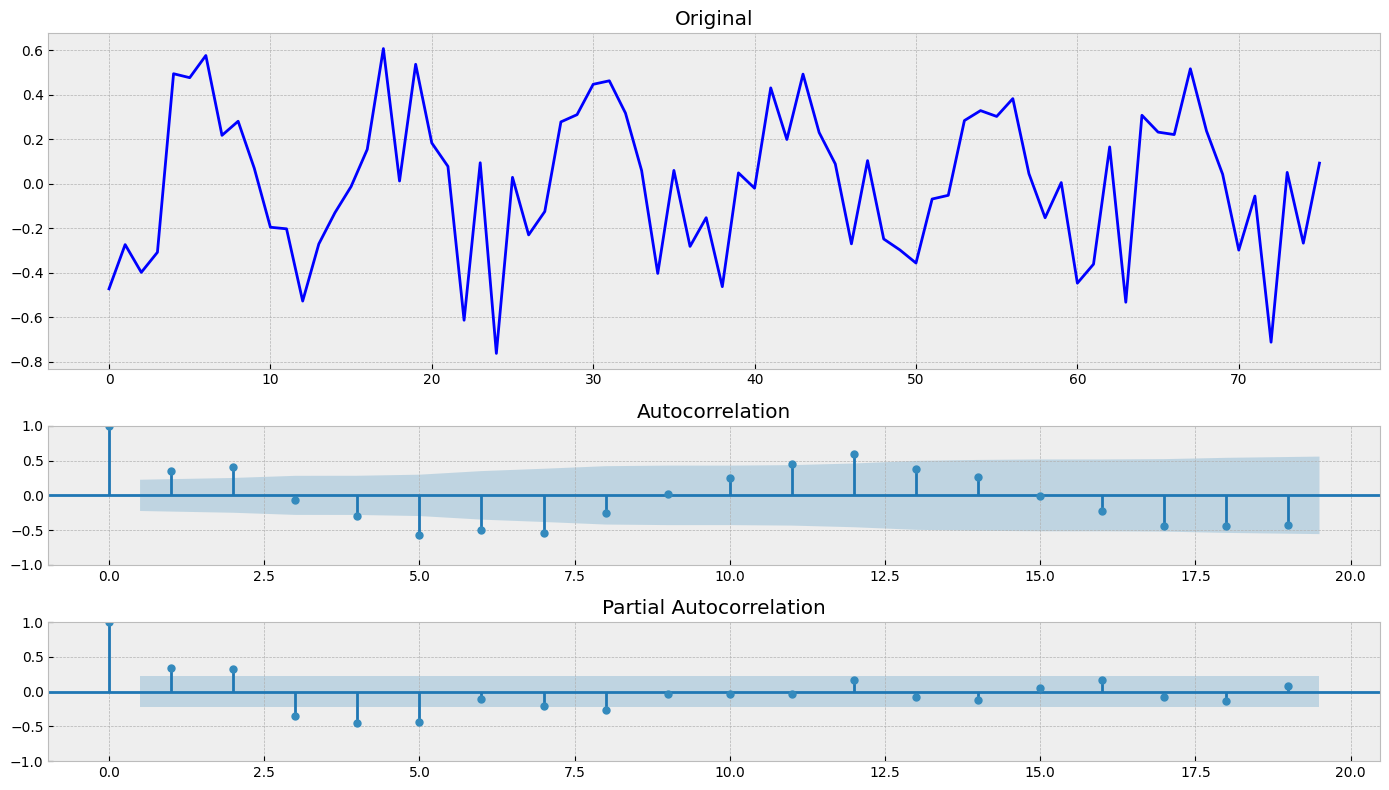

In [163]:
test_stationarity(monthly_sales_of_company_X)
tsplot(monthly_sales_of_company_X)

In [164]:
monthly_sales_of_company_X = np.diff(monthly_sales_of_company_X, 12)

Results of Dickey-Fuller Test:
Test Statistic                -6.850387e+00
p-value                        1.700212e-09
#Lags Used                     1.100000e+01
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


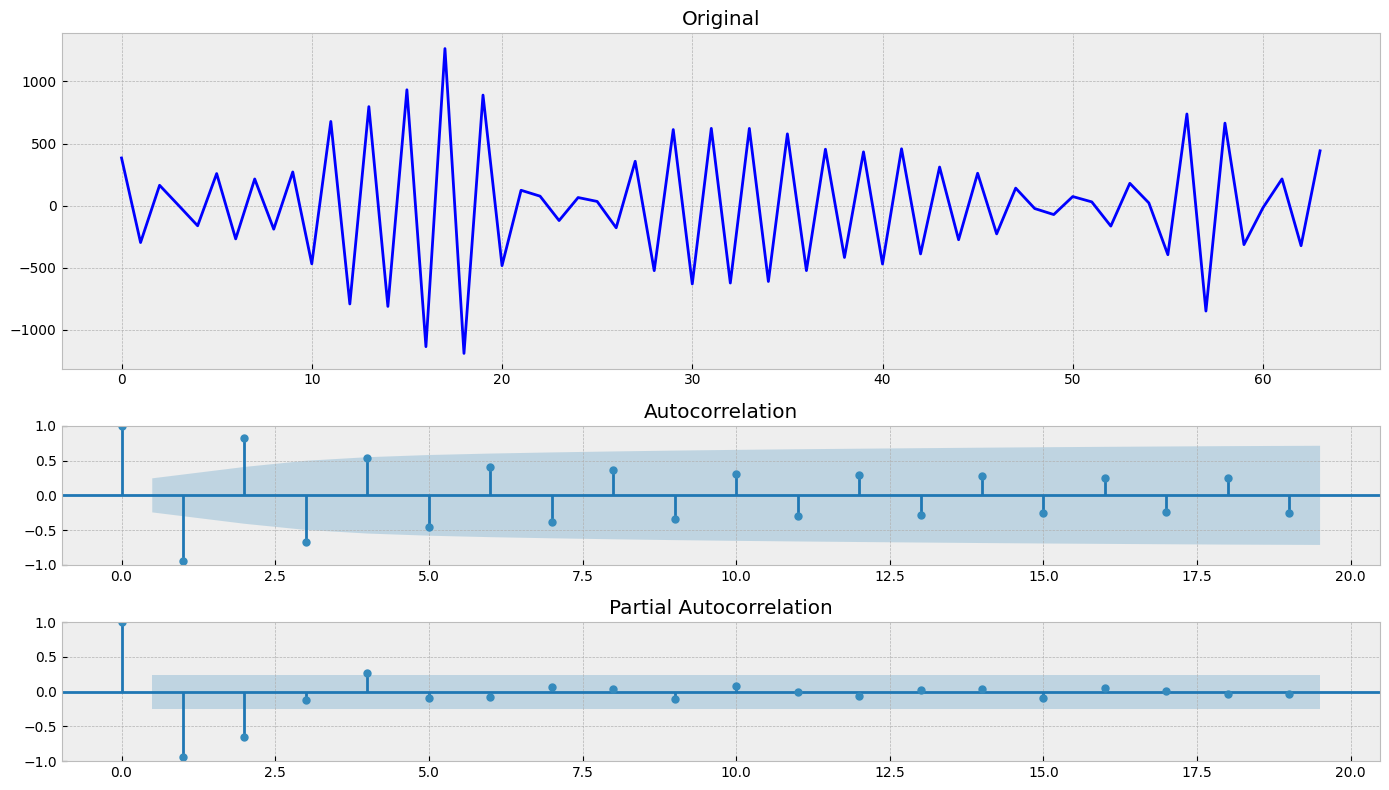

In [165]:
# Проверяем

test_stationarity(monthly_sales_of_company_X)
tsplot(monthly_sales_of_company_X)

# 2. Monthly Boston armed robberies

In [166]:
test_stationarity(all_series["Monthly Boston armed robberies"])

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


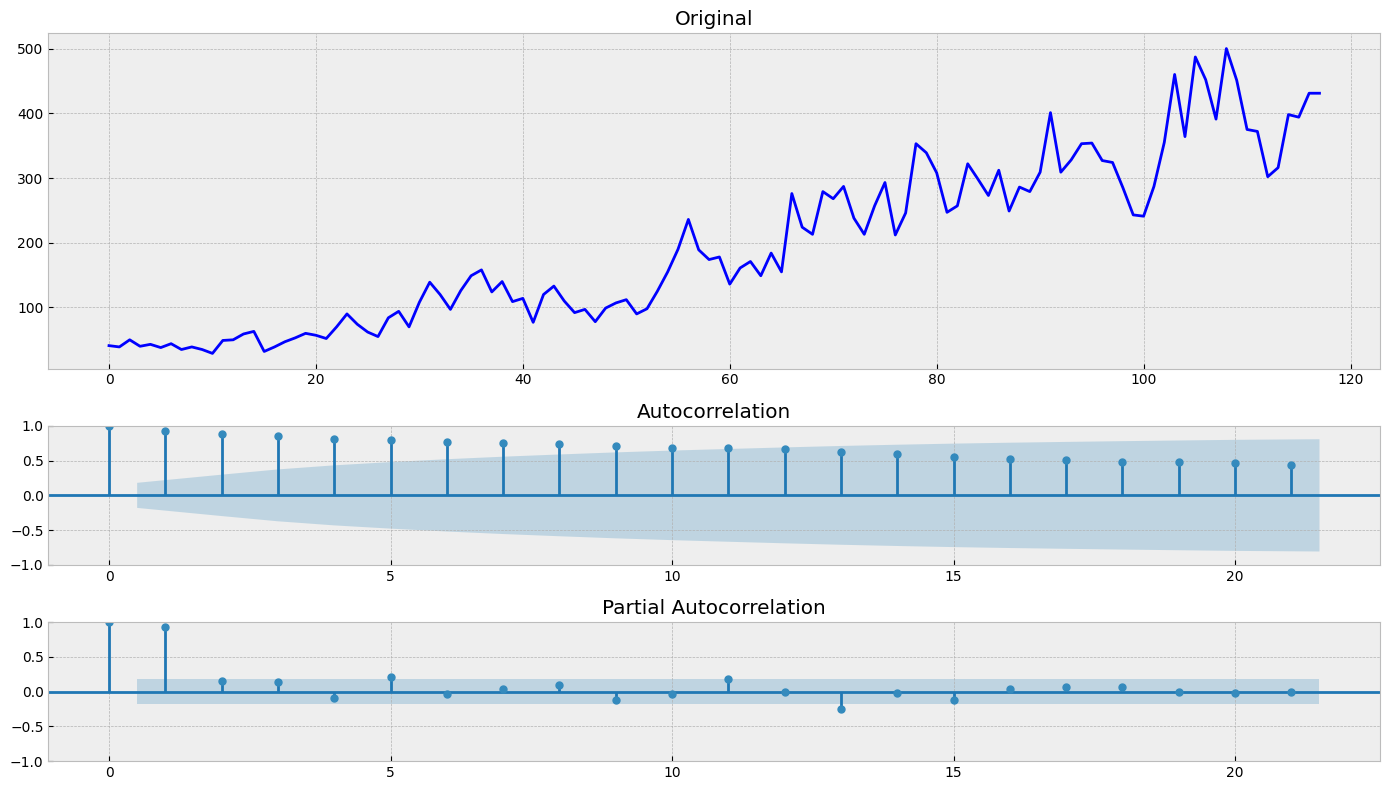

In [167]:
tsplot(all_series["Monthly Boston armed robberies"])

In [174]:
# Нормализуем дисперсию

monthly_boston_armed_robberies = boxcox(all_series["Monthly Boston armed robberies"], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


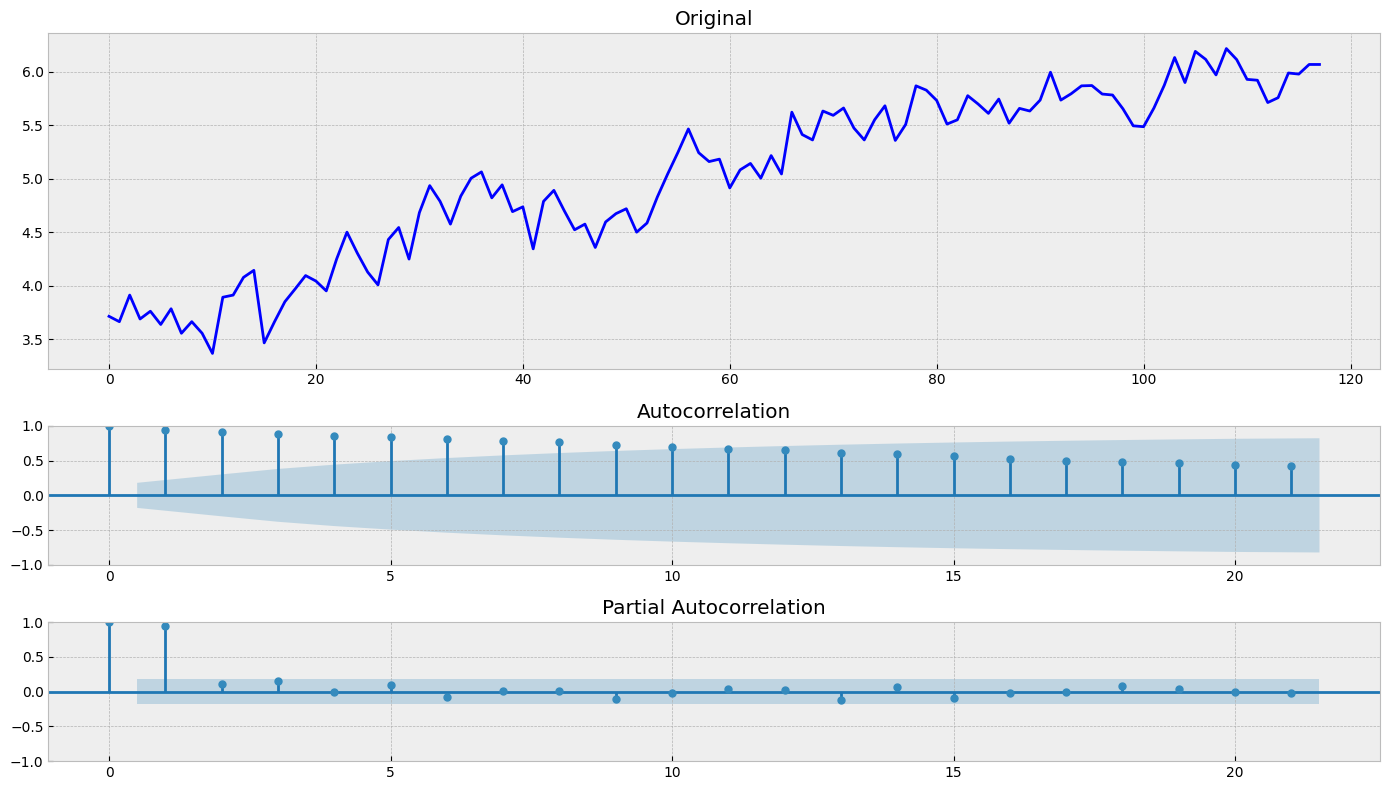

In [175]:
test_stationarity(monthly_boston_armed_robberies)
tsplot(monthly_boston_armed_robberies)

In [176]:
# Убираем тренд

monthly_boston_armed_robberies = np.diff(monthly_boston_armed_robberies, 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


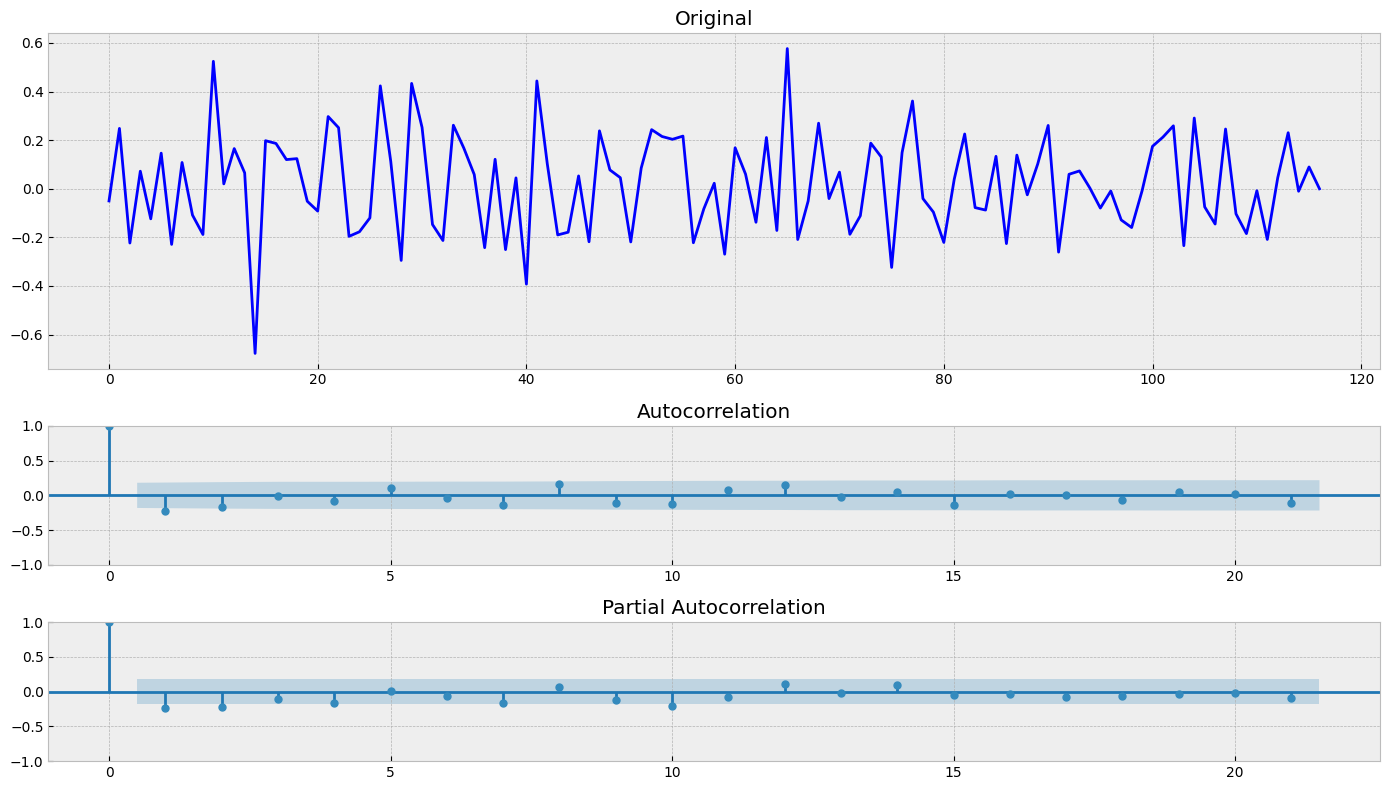

In [177]:
test_stationarity(monthly_boston_armed_robberies)
tsplot(monthly_boston_armed_robberies)

# 3. International airline passengers: monthly totals in thousands

In [178]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


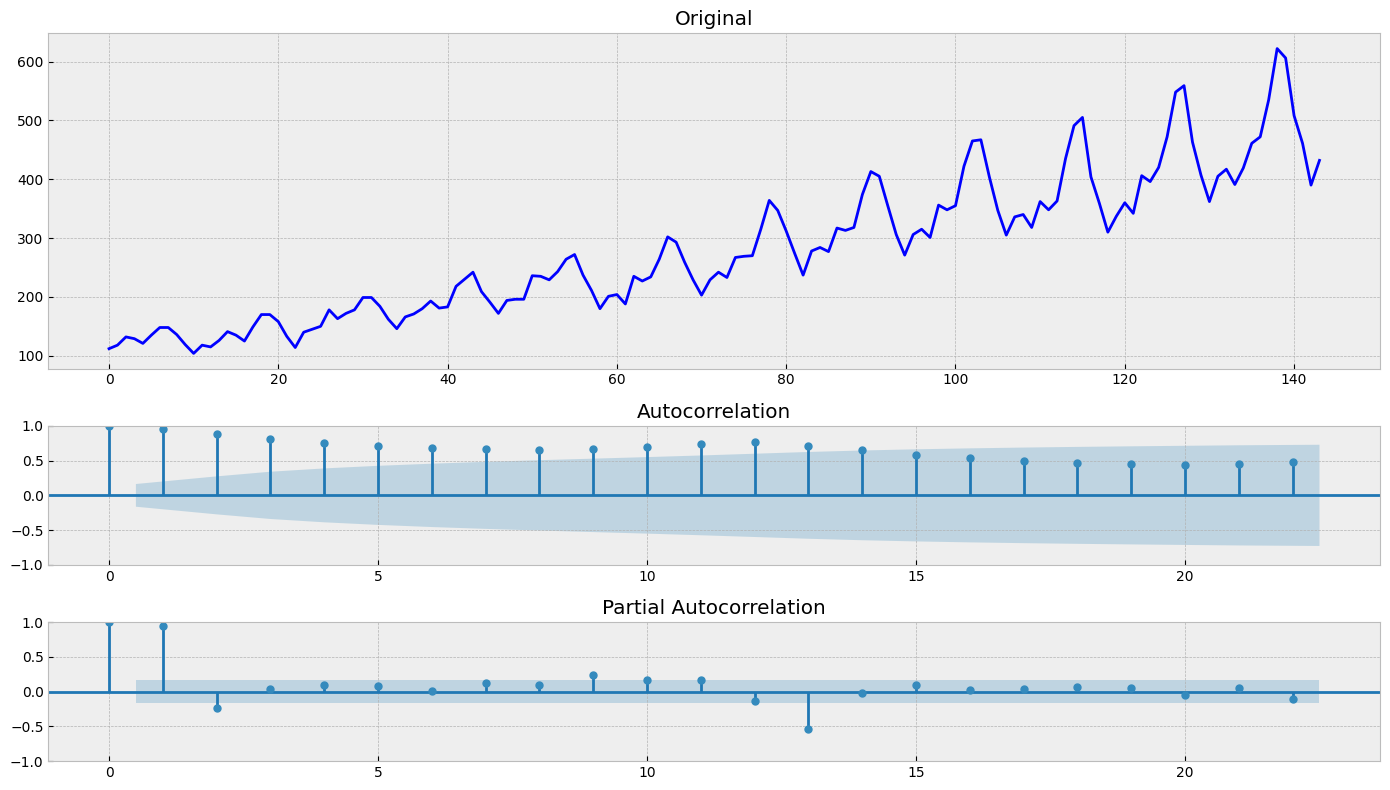

In [179]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])

In [180]:
# Нормализуем дисперсию

international_airline_passengers = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


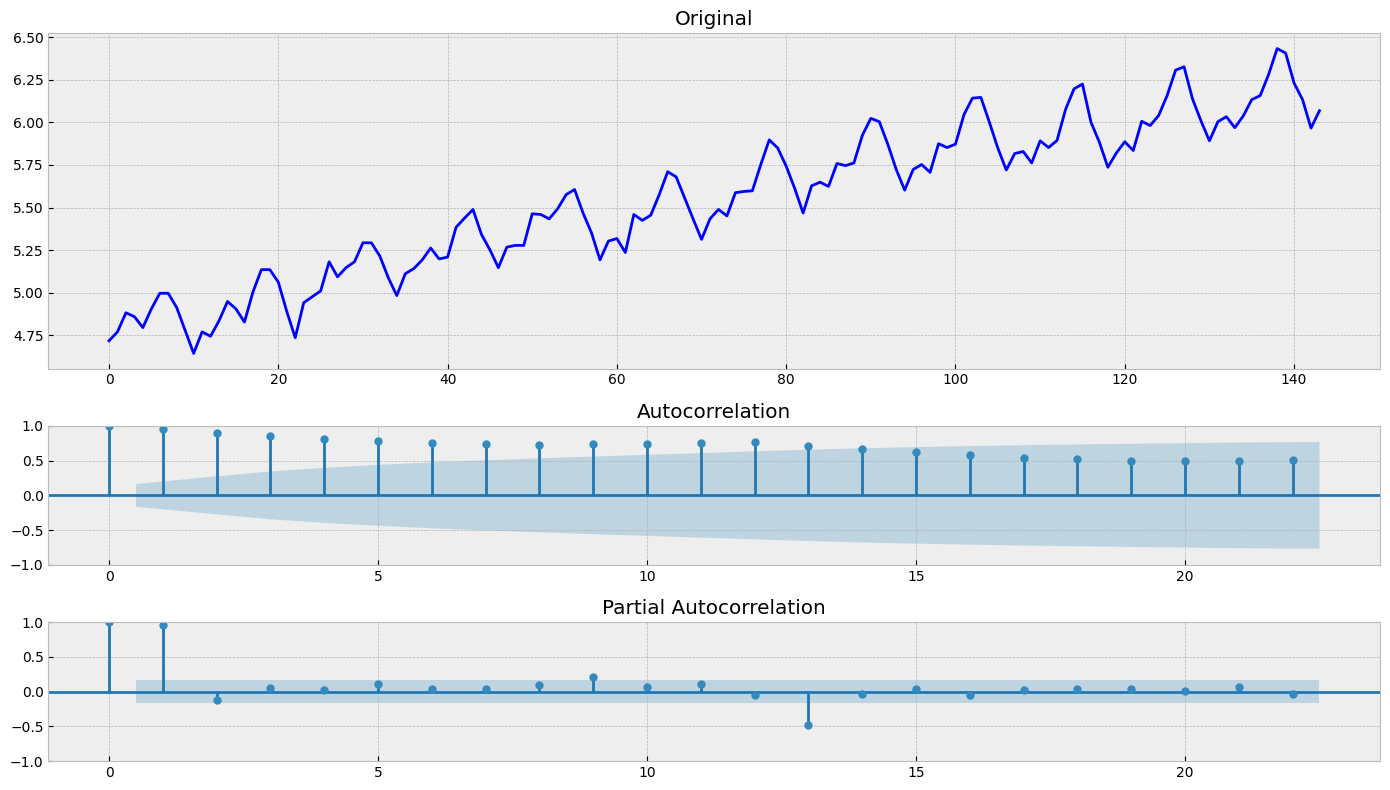

In [181]:
test_stationarity(international_airline_passengers)
tsplot(international_airline_passengers)

In [182]:
# Убираем тренд

international_airline_passengers = np.diff(international_airline_passengers, 1)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


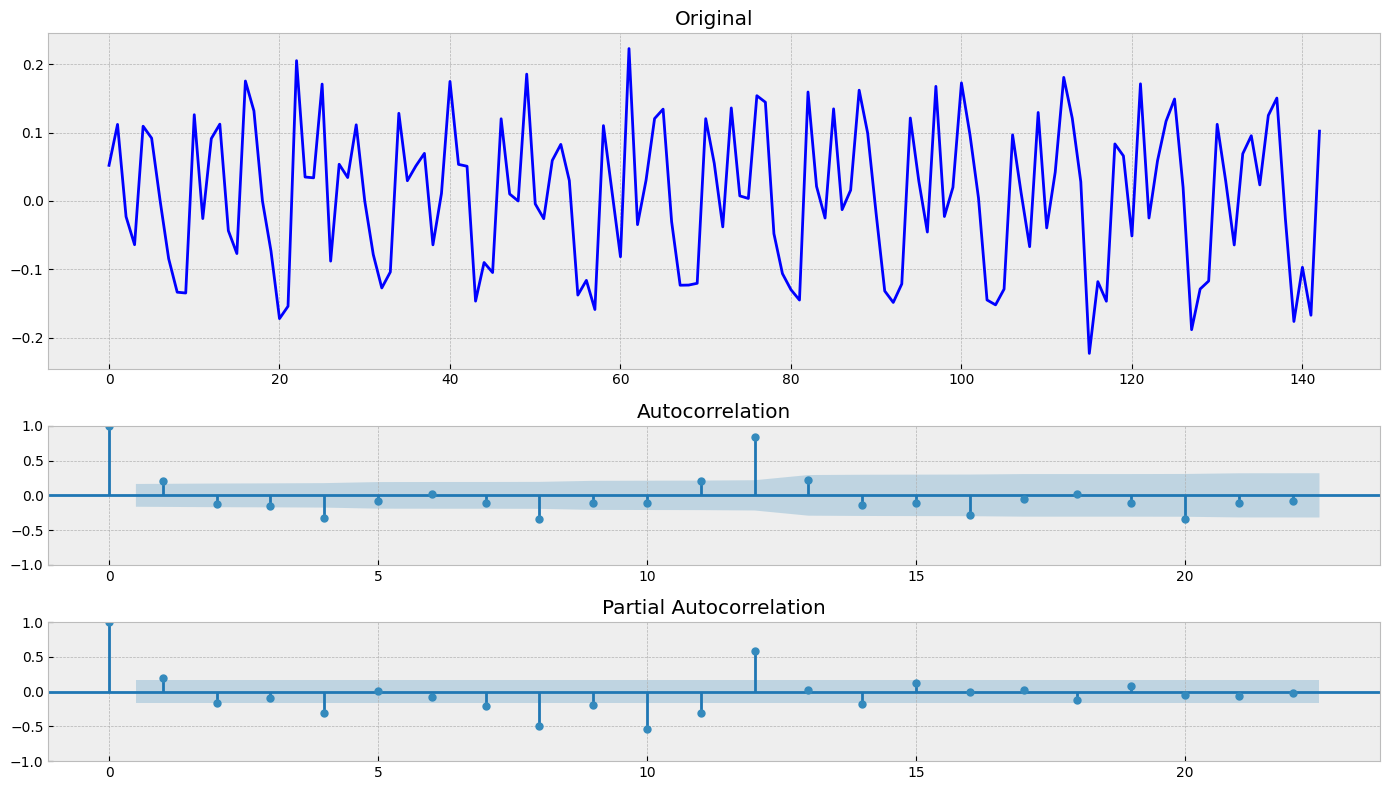

In [183]:
test_stationarity(international_airline_passengers)
tsplot(international_airline_passengers)

In [184]:
# Убираем сезонность

international_airline_passengers = np.diff(international_airline_passengers, 12)

Results of Dickey-Fuller Test:
Test Statistic                -1.609085e+01
p-value                        5.255378e-29
#Lags Used                     1.300000e+01
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64


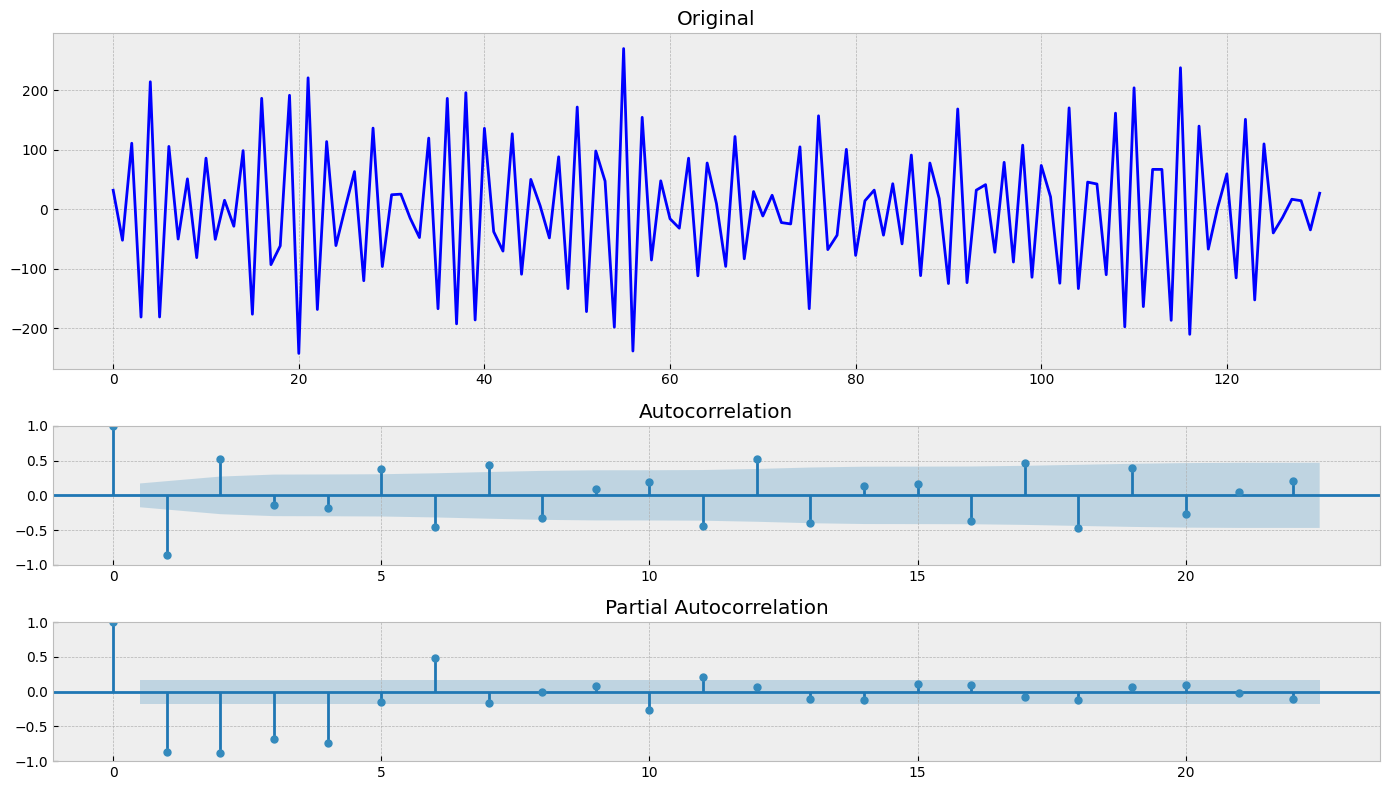

In [185]:
test_stationarity(international_airline_passengers)
tsplot(international_airline_passengers)

# 4. Mean monthly air temperature (Deg. F) Nottingham Castle

In [186]:
test_stationarity(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


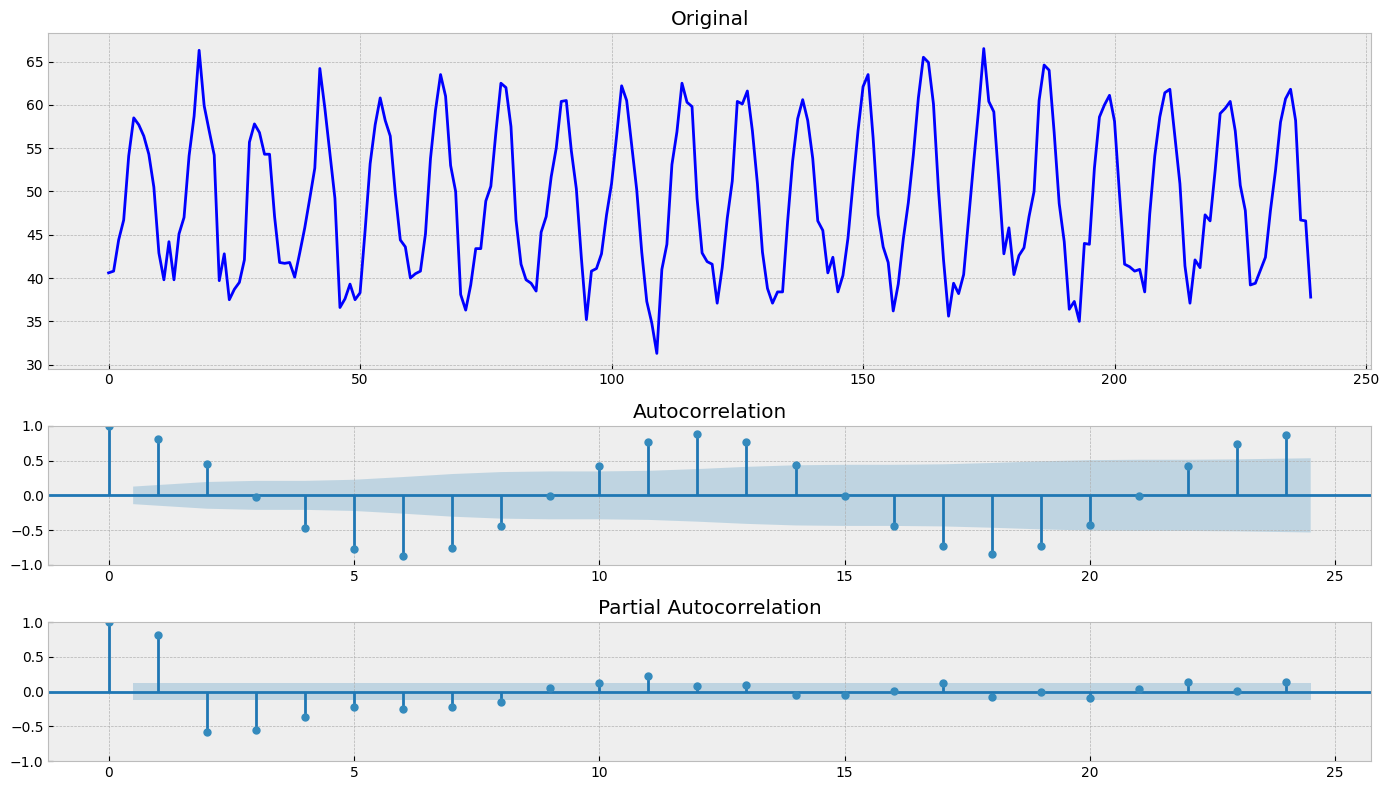

In [187]:
tsplot(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

In [188]:
# Нормализуем дисперсию

mean_monthly_air_temperature = boxcox(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


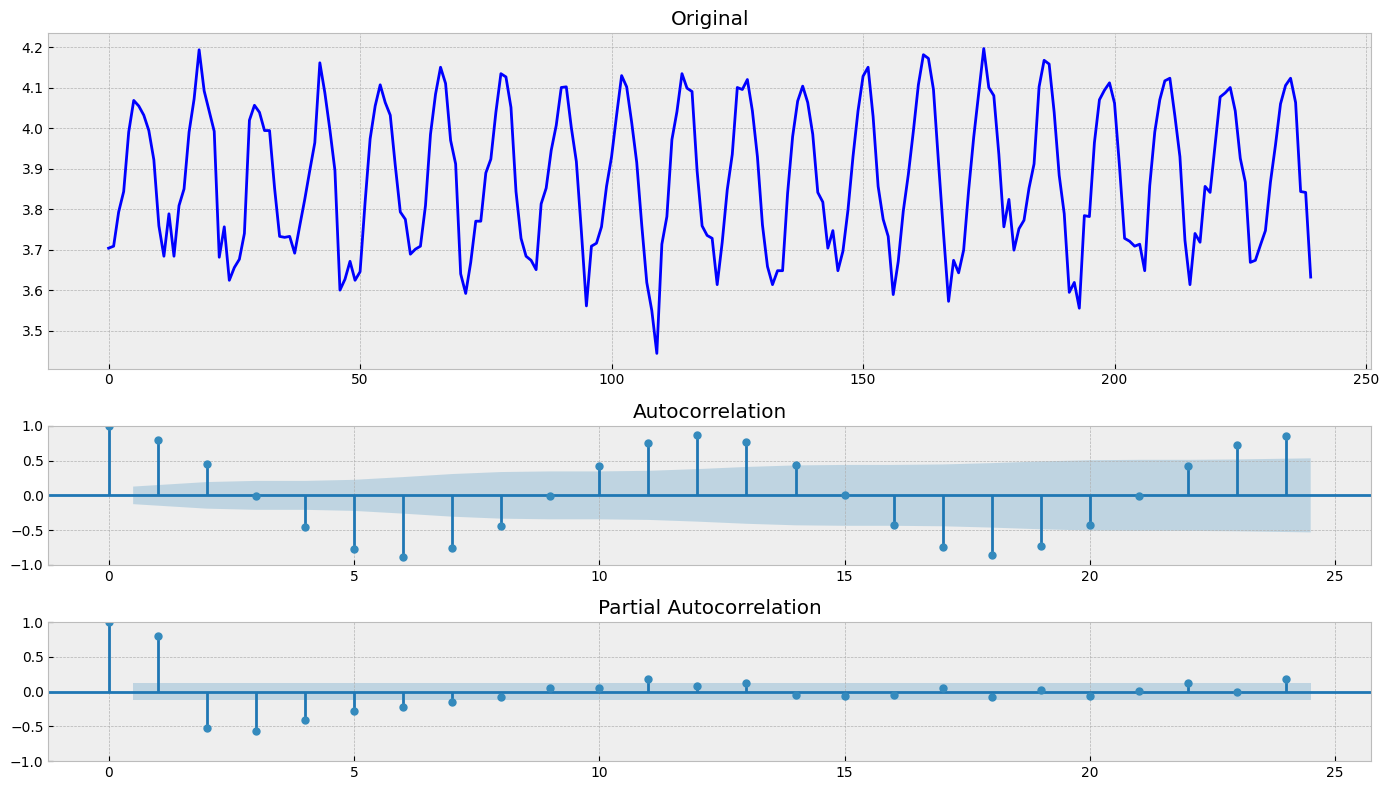

In [189]:
test_stationarity(mean_monthly_air_temperature)
tsplot(mean_monthly_air_temperature)

In [190]:
# Убираем сезонность

mean_monthly_air_temperature = np.diff(mean_monthly_air_temperature, 12)

Results of Dickey-Fuller Test:
Test Statistic                -1.513025e+01
p-value                        7.248952e-28
#Lags Used                     1.500000e+01
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


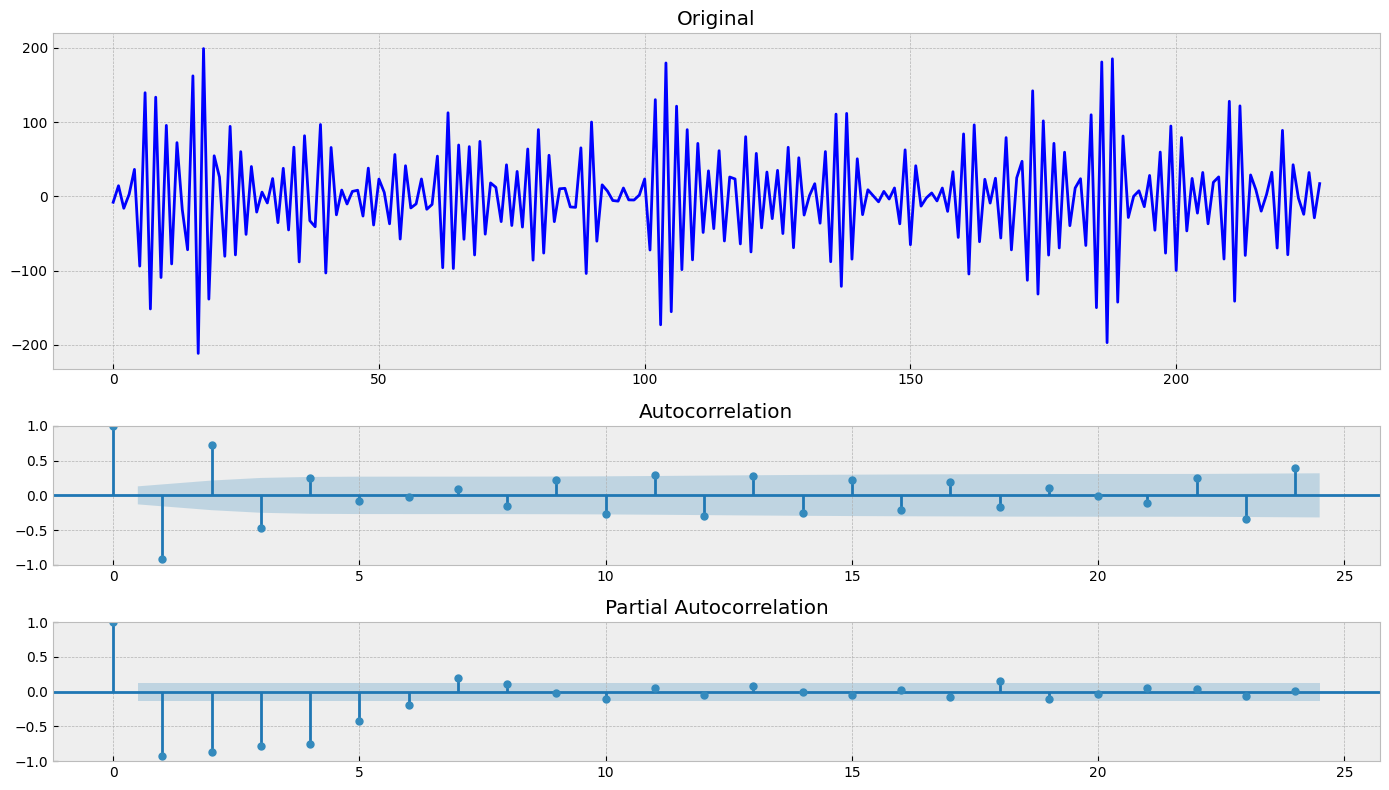

In [191]:
test_stationarity(mean_monthly_air_temperature)
tsplot(mean_monthly_air_temperature)

# 5. Weekly closings of the Dow-Jones industrial average

In [192]:
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


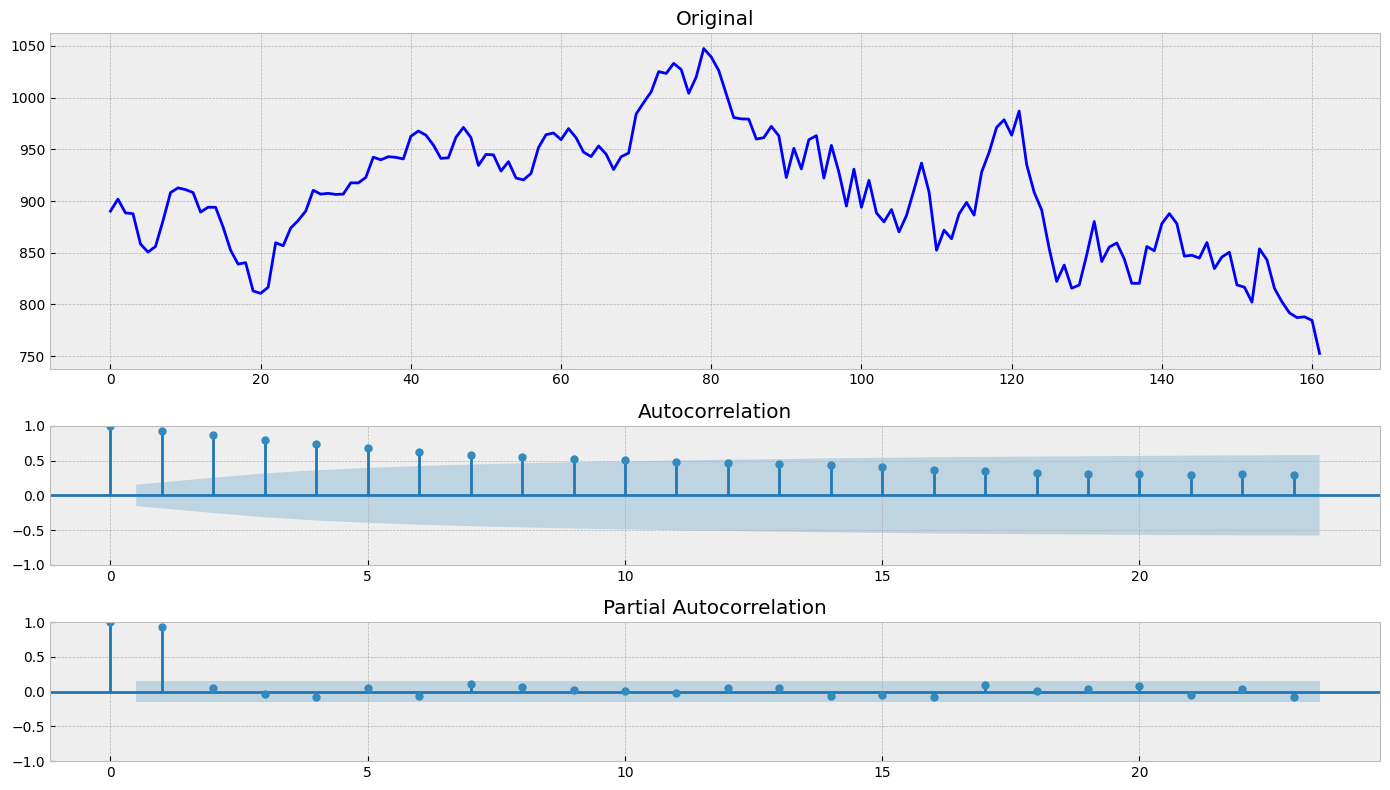

In [193]:
tsplot(all_series["Weekly closings of the Dow-Jones industrial average"])

In [194]:
# Нормализуем дисперсию

weekly_dow_jones = boxcox(all_series["Weekly closings of the Dow-Jones industrial average"], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


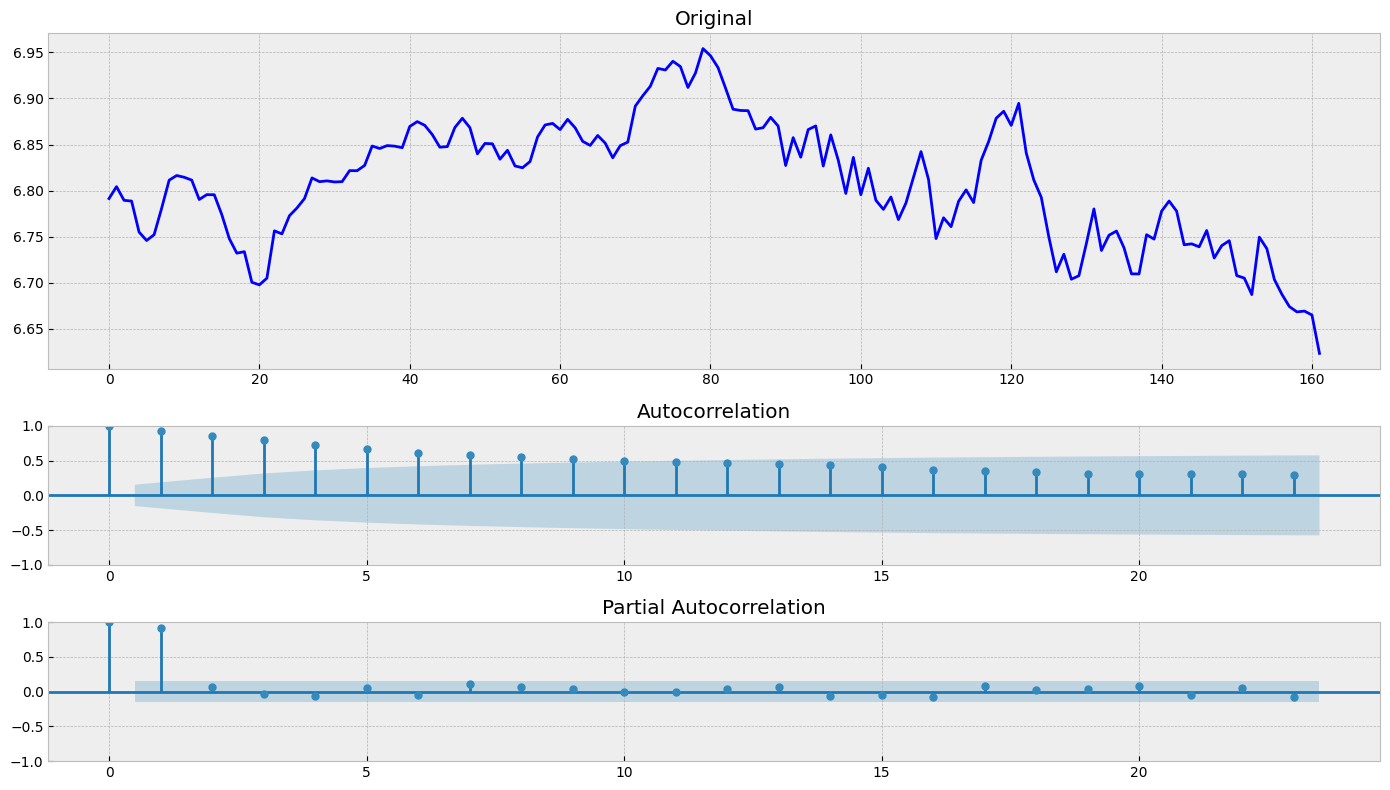

In [195]:
test_stationarity(weekly_dow_jones)
tsplot(weekly_dow_jones)

In [196]:
# Убираем тренд

weekly_dow_jones = np.diff(weekly_dow_jones, 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


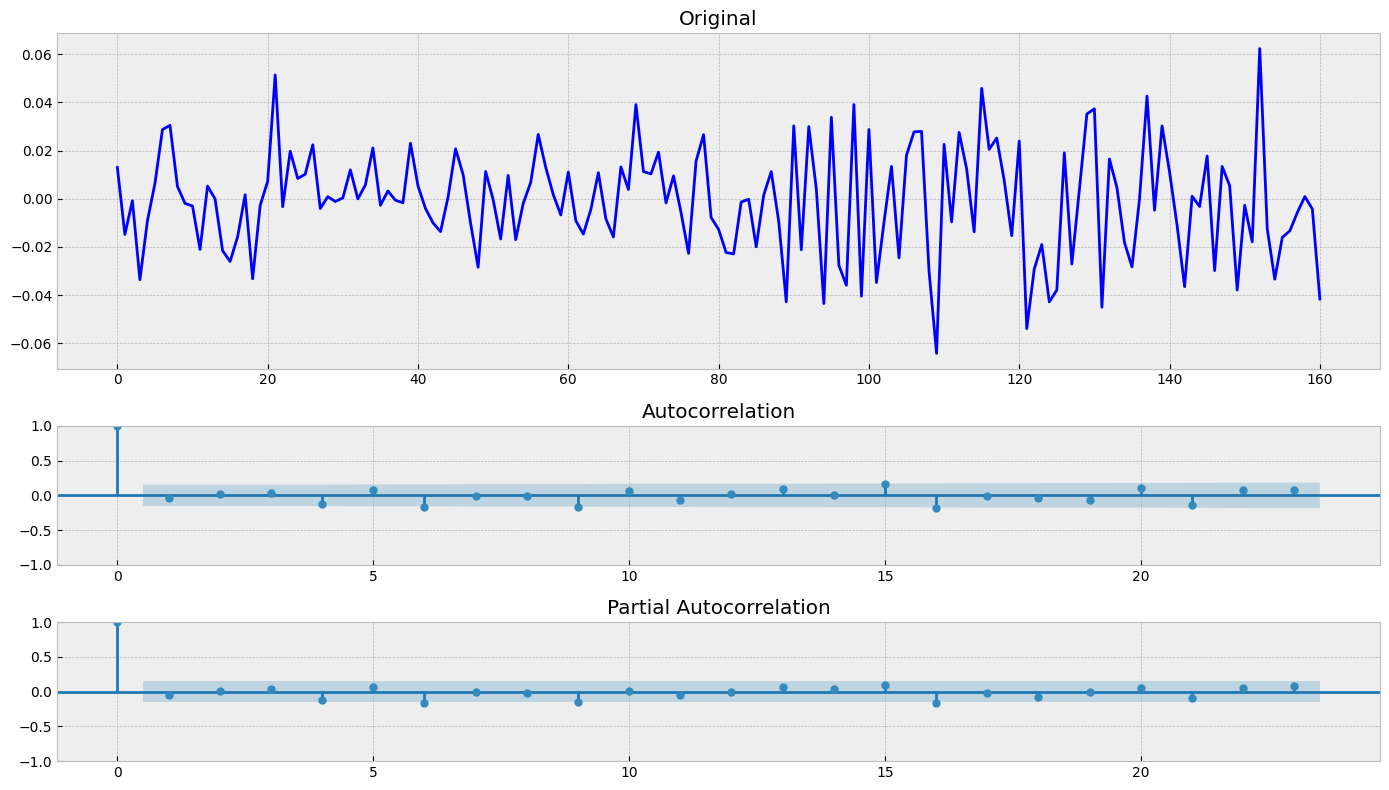

In [197]:
test_stationarity(weekly_dow_jones)
tsplot(weekly_dow_jones)

In [198]:
weekly_dow_jones = np.diff(weekly_dow_jones, 52)

Results of Dickey-Fuller Test:
Test Statistic                -26.621049
p-value                         0.000000
#Lags Used                     13.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


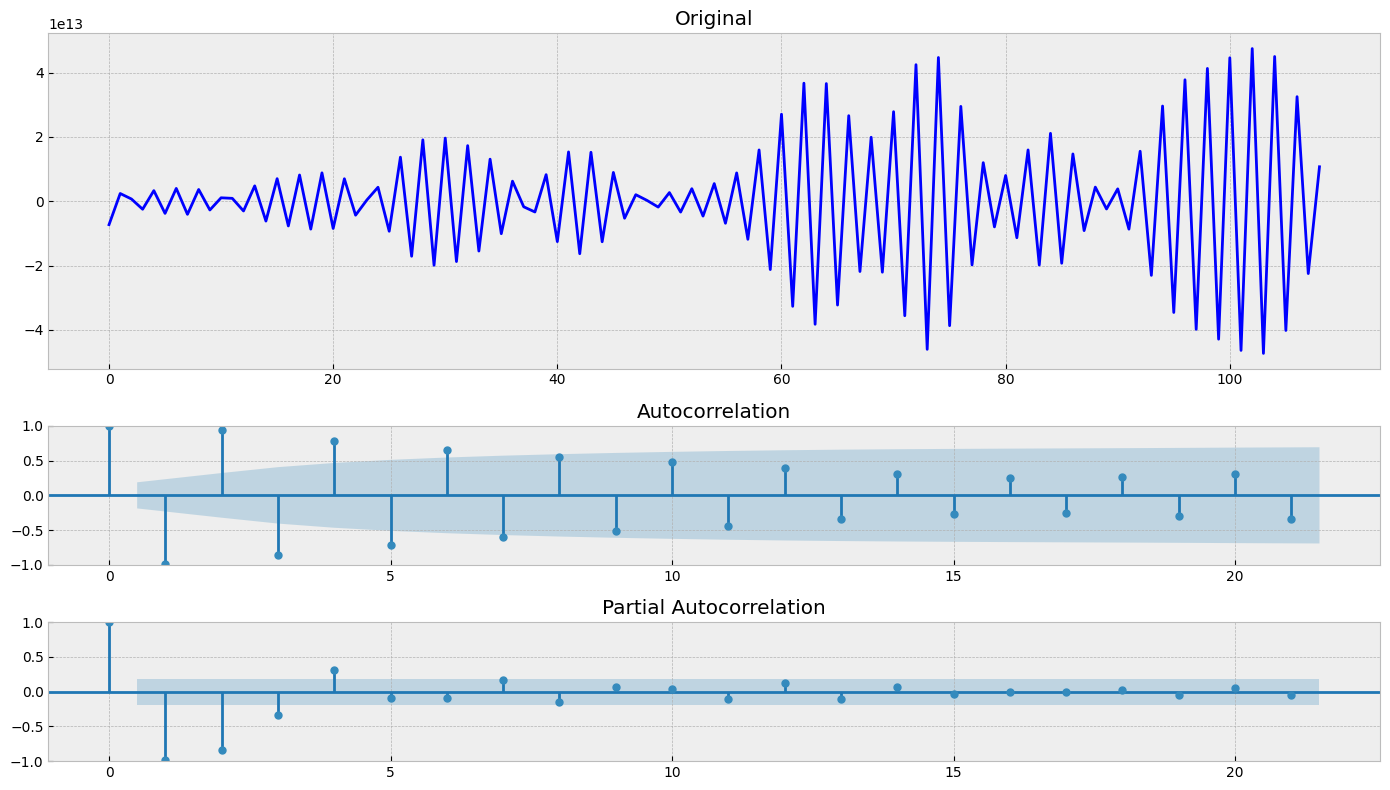

In [199]:
test_stationarity(weekly_dow_jones)
tsplot(weekly_dow_jones)

# 6. Daily total female births in California

In [200]:
test_stationarity(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


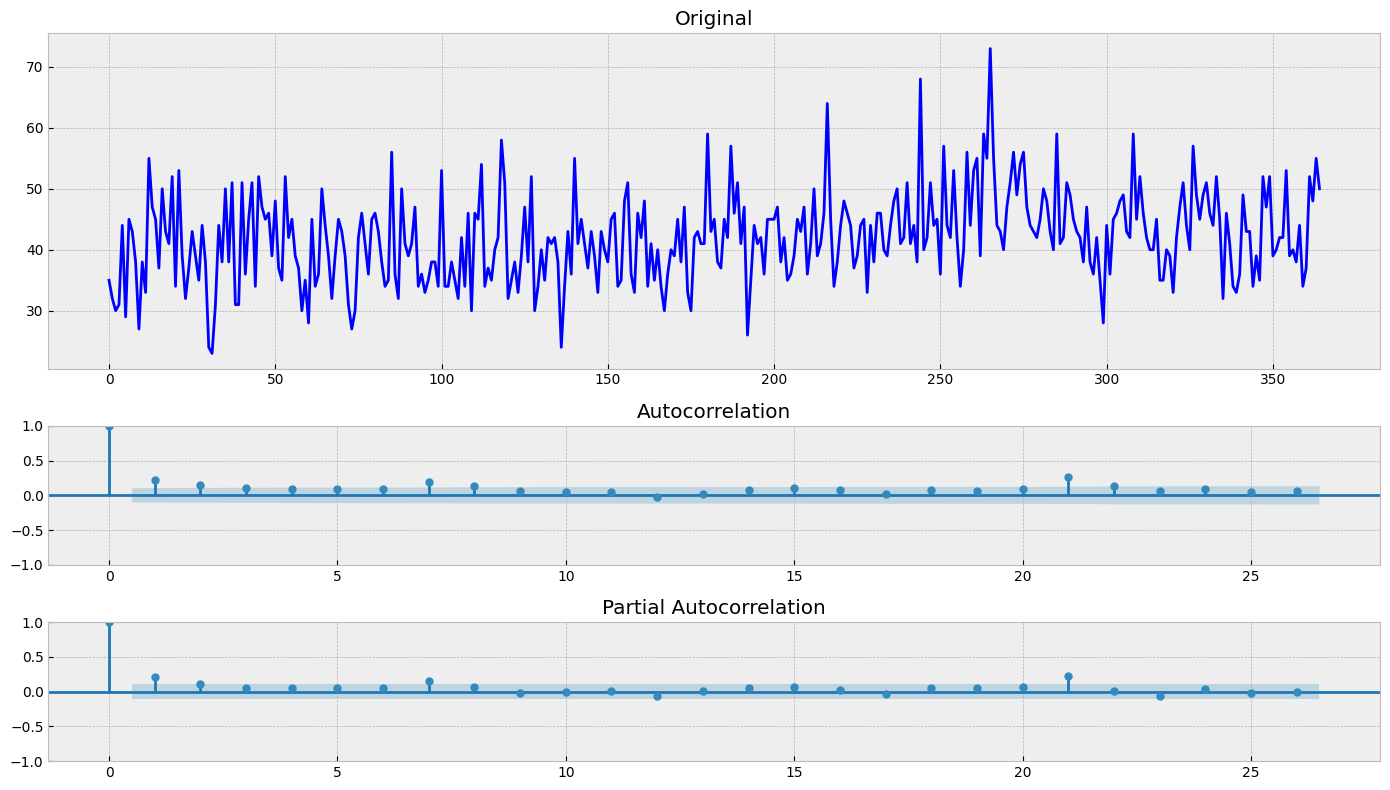

In [201]:
tsplot(all_series["Daily total female births in California"])

In [206]:
daily_total_female_births = boxcox(all_series["Daily total female births in California"], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -4.353173
p-value                          0.000359
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


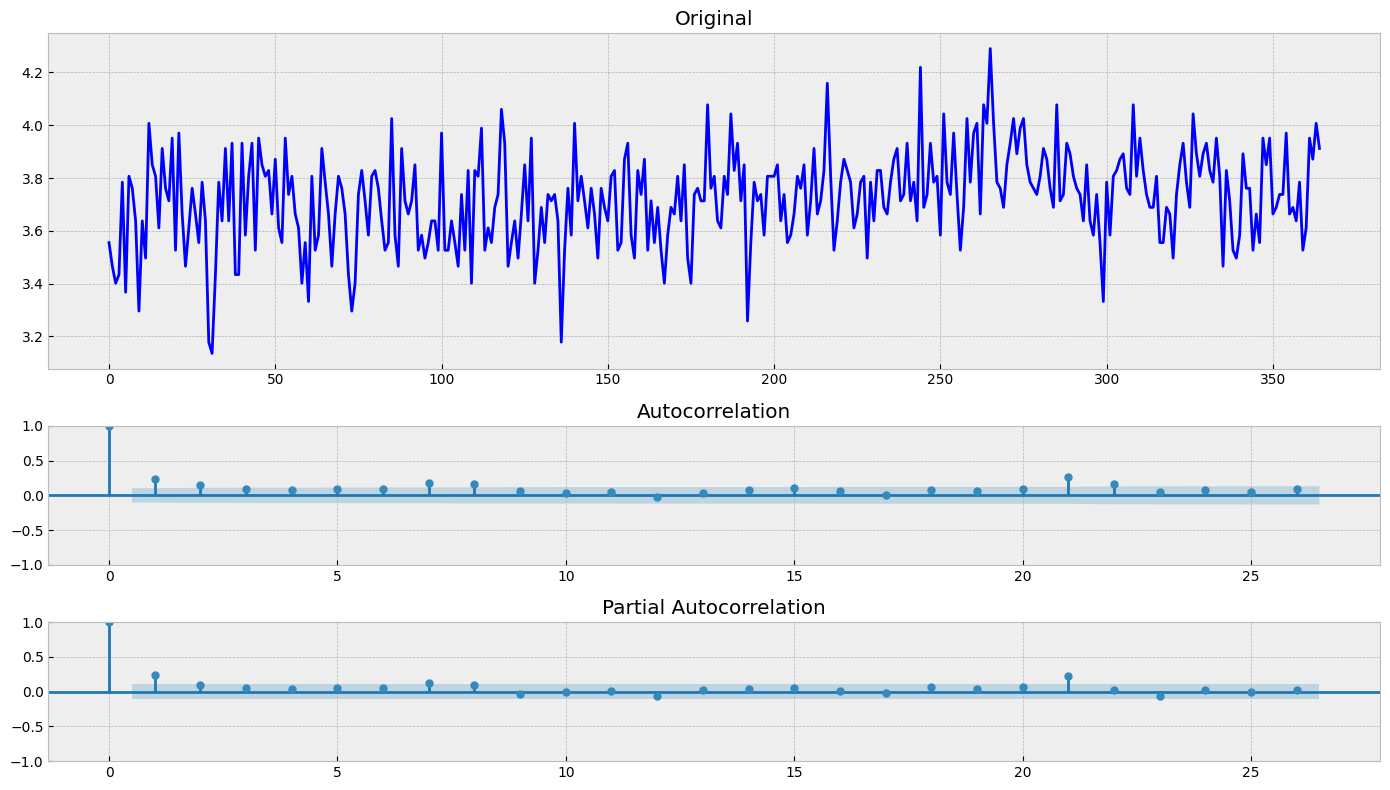

In [207]:
test_stationarity(daily_total_female_births)
tsplot(daily_total_female_births)

In [208]:
daily_total_female_births = np.diff(daily_total_female_births, 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.296334e+01
p-value                        3.191205e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


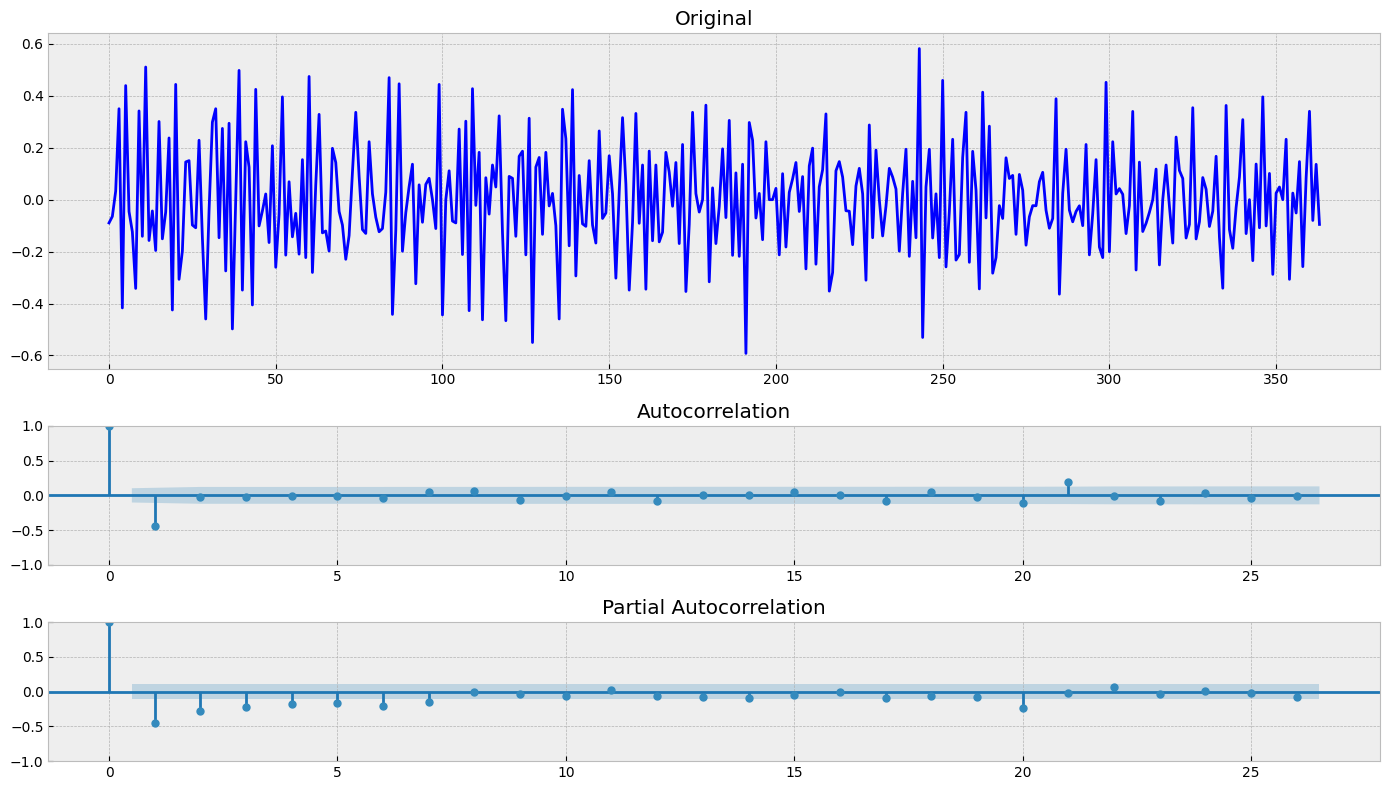

In [209]:
test_stationarity(daily_total_female_births)
tsplot(daily_total_female_births)

In [210]:
daily_total_female_births = np.diff(daily_total_female_births, 30)

Results of Dickey-Fuller Test:
Test Statistic                 -32.390974
p-value                          0.000000
#Lags Used                      17.000000
Number of Observations Used    316.000000
Critical Value (1%)             -3.451215
Critical Value (5%)             -2.870730
Critical Value (10%)            -2.571666
dtype: float64


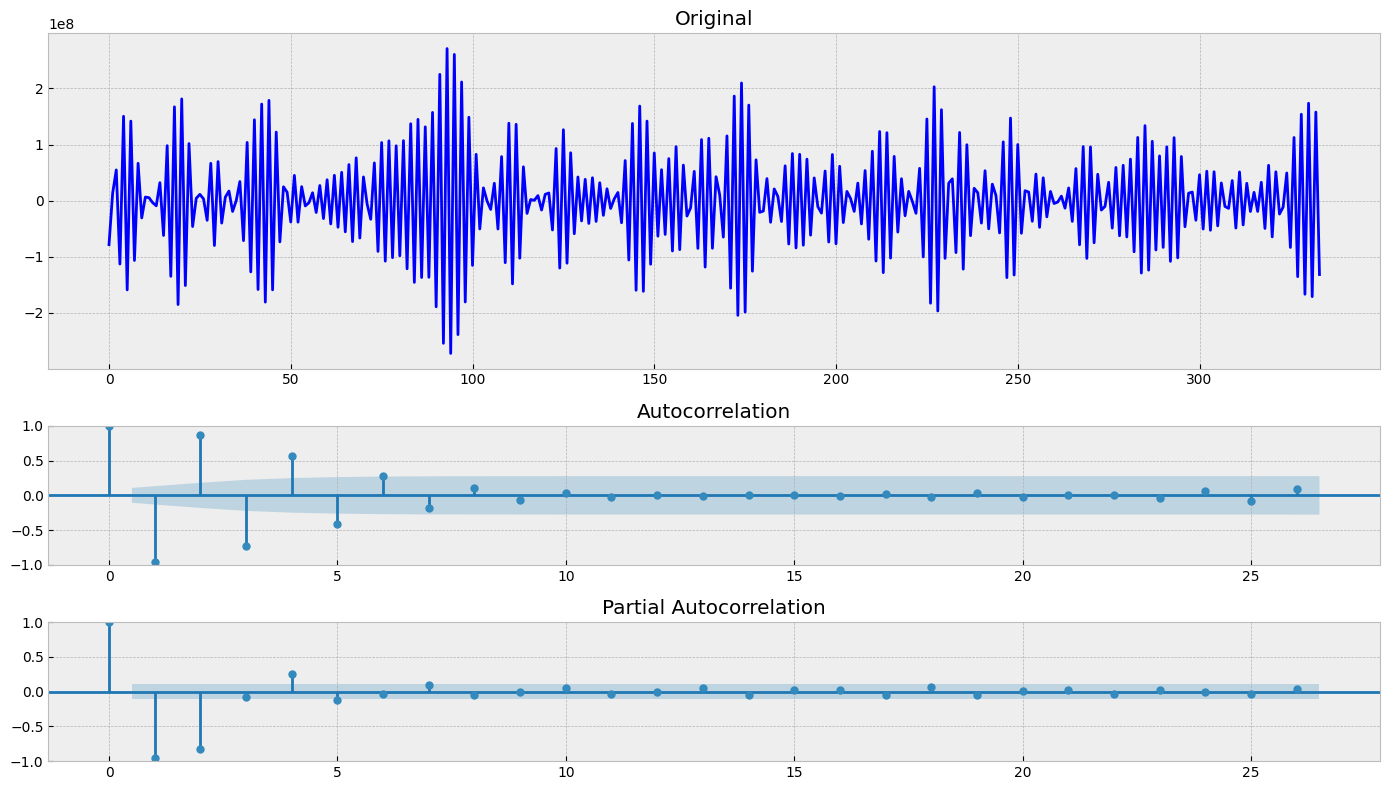

In [211]:
test_stationarity(daily_total_female_births)
tsplot(daily_total_female_births)